This code is part of EE468 projrct done by : Khalid alorayir 24/5/20
submitted to : Anas alhussayen

In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"khalidalorayir","key":"8d119b32dee1b633e87de613dd4cf5a8"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
!kaggle datasets download -d bmadushanirodrigo/fracture-multi-region-x-ray-data

Dataset URL: https://www.kaggle.com/datasets/bmadushanirodrigo/fracture-multi-region-x-ray-data
License(s): ODC Public Domain Dedication and Licence (PDDL)
fracture-multi-region-x-ray-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip fracture-multi-region-x-ray-data.zip

In [7]:
import os

# Define the base directory where train data is located
base_dir = "/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train"

# Define the classes
classes = ["fractured", "not fractured"]

# Calculate the number of images in the training dataset
total_train_images = 0
for class_name in classes:
    dir_path = os.path.join(base_dir, class_name)
    num_images = len(os.listdir(dir_path))
    total_train_images += num_images

print("Total number of images in the training dataset:", total_train_images)

Total number of images in the training dataset: 9246


In [8]:

# Define the base directory where test data is located
base_dir = "/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test"

# Define the classes
classes = ["fractured", "not fractured"]

# Calculate the number of images in the testing dataset
total_test_images = 0
num_images = 0 # to avoid add it to train images number
for class_name in classes:
    dir_path = os.path.join(base_dir, class_name)
    num_images = len(os.listdir(dir_path))
    total_test_images += num_images

print("Total number of images in the testing dataset:", total_test_images)

Total number of images in the testing dataset: 506


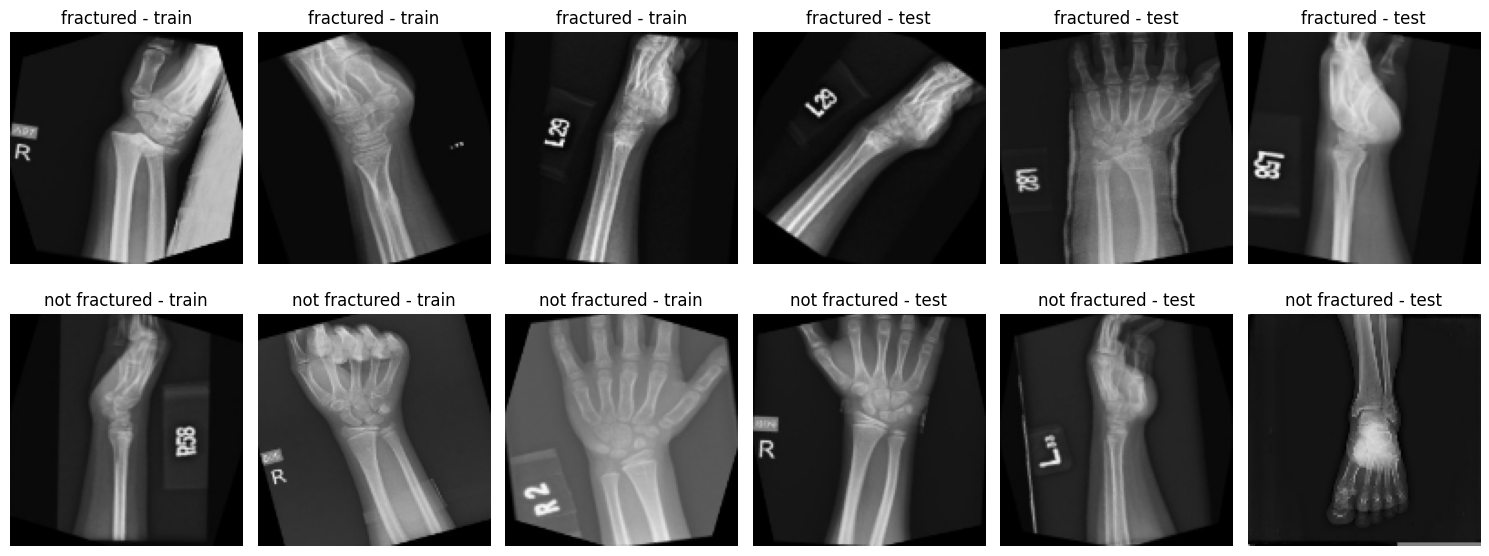

In [9]:

import cv2
import random
import matplotlib.pyplot as plt

# Define the base directory where train and test data are located
base_dir = "/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification"

# Define the classes
classes = ["fractured", "not fractured"]

# Display 3 sample images from each class in both train and test sets
num_samples_per_class = 3

# Common size for resizing the images
resize_width = 128
resize_height = 128

# Create a figure to display images
fig, axes = plt.subplots(len(classes), 2*num_samples_per_class, figsize=(15, 6))

# Loop through each class
for i, class_name in enumerate(classes):
    # Loop through train and test sets
    for j, dataset_type in enumerate(["train", "test"]):
        # Define the directory path
        dir_path = os.path.join(base_dir, dataset_type, class_name)
        # List all files in the directory
        file_list = os.listdir(dir_path)
        # Randomly select 3 sample images
        sample_files = random.sample(file_list, num_samples_per_class)
        # Display the sample images
        for k, file_name in enumerate(sample_files):
            img_path = os.path.join(dir_path, file_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            # Resize the image to a common size
            img = cv2.resize(img, (resize_width, resize_height))
            axes[i, j*num_samples_per_class + k].imshow(img)
            axes[i, j*num_samples_per_class + k].axis('off')
            axes[i, j*num_samples_per_class + k].set_title(f"{class_name} - {dataset_type}")

plt.tight_layout()
plt.show()

In [10]:
pip install tensorflow keras

In [11]:
def load_data():
    images = []
    labels = []
    for i, class_name in enumerate(classes):
        dir_path = os.path.join(base_dir, class_name)
        for file_name in os.listdir(dir_path):
            img_path = os.path.join(dir_path, file_name)
            img = cv2.imread(img_path)
            if img is not None:  # Check if the image is loaded successfully
                img = cv2.resize(img, (img_width, img_height))
                images.append(img)
                labels.append(i)  # Assigning class index as label
            else:
                print(f"Warning: Unable to load image '{img_path}'")
    return np.array(images), np.array(labels)

In [12]:

import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define the base directory where train data is located
base_dir = "/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train"

# Define the classes
classes = ["fractured", "not fractured"]

# Define image dimensions and channels
img_width, img_height = 128, 128
channels = 3  # RGB

# Function to load images and labels
def load_data():
    images = []
    labels = []
    for i, class_name in enumerate(classes):
        dir_path = os.path.join(base_dir, class_name)
        for file_name in os.listdir(dir_path):
            img_path = os.path.join(dir_path, file_name)
            img = cv2.imread(img_path)
            if img is not None:  # Check if the image is loaded successfully
                img = cv2.resize(img, (img_width, img_height))
                images.append(img)
                labels.append(i)  # Assigning class index as label
            else:
                print(f"Warning: Unable to load image '{img_path}'")
    return np.array(images), np.array(labels)

# Load the data
images, labels = load_data()

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=len(classes))
y_val = to_categorical(y_val, num_classes=len(classes))

# Normalize the pixel values
X_train = X_train.astype('float32') / 255
X_val = X_val.astype('float32') / 255

# Check for empty images
print("Number of empty images in training data:", np.sum([img.size == 0 for img in X_train]))
print("Number of empty images in validation data:", np.sum([img.size == 0 for img in X_val]))

Number of empty images in training data: 0
Number of empty images in validation data: 0


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2 , activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [21]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
232/232 [==============================] - 228s 979ms/step - loss: 0.0167 - accuracy: 0.9936 - val_loss: 0.0444 - val_accuracy: 0.9881
Epoch 2/10
232/232 [==============================] - 225s 973ms/step - loss: 0.0156 - accuracy: 0.9950 - val_loss: 0.0483 - val_accuracy: 0.9903
Epoch 3/10
 11/232 [>.............................] - ETA: 3:31 - loss: 0.0103 - accuracy: 0.9972

KeyboardInterrupt: 

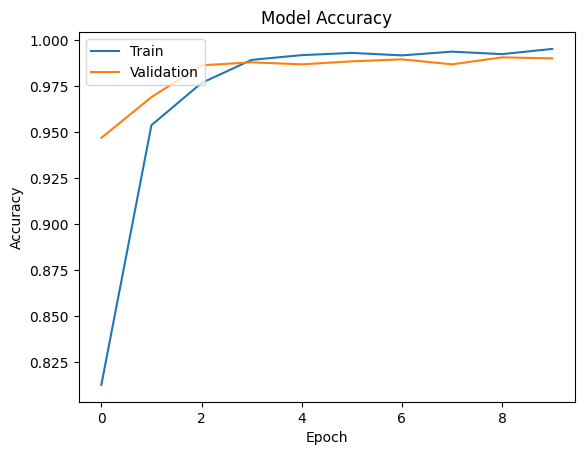

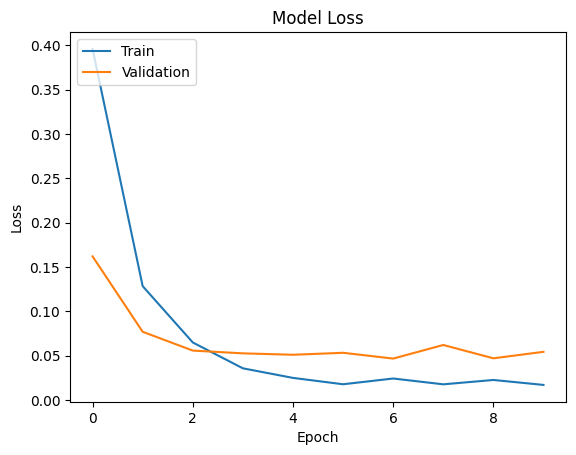

In [15]:
def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_accuracy(history)
plot_loss(history)

In [28]:
# Define the base directory where test data is located
base_dir = "/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test"

# Define the classes
classes = ["fractured", "not fractured"]

# Define image dimensions and channels
img_width, img_height = 128, 128
channels = 3  # RGB

# Function to load test images and labels
def load_test_data():
    images = []
    labels = []
    for i, class_name in enumerate(classes):
        dir_path = os.path.join(base_dir, class_name)
        for file_name in os.listdir(dir_path):
            img_path = os.path.join(dir_path, file_name)
            img = cv2.imread(img_path)
            if img is not None:  # Check if the image is loaded successfully
                img = cv2.resize(img, (img_width, img_height))
                images.append(img)
                labels.append(i)  # Assigning class index as label
            else:
                print(f"Warning: Unable to load image '{img_path}'")
    return np.array(images), np.array(labels)

# Load the test data
X_test, y_test = load_test_data()

# Normalize the pixel values
X_test = X_test.astype('float32') / 255

# Print the shape of the test data
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_test: (506, 128, 128, 3)
Shape of y_test: (506,)


In [29]:
from keras.utils import to_categorical

# Convert y_test to one-hot encoded format
y_test_encoded = to_categorical(y_test, num_classes=2)

# Now, y_test_encoded should have the shape (506, num_classes)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

16/16 [==============================] - 4s 224ms/step - loss: 0.1443 - accuracy: 0.9684
Test Loss: 0.1443023830652237
Test Accuracy: 0.9683794379234314


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Set the threshold
threshold = 0.1  # You can adjust this value as needed

# Get predictions on test set
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Convert probabilities to class labels based on the threshold
y_pred_classes_adjusted = np.where(y_pred_probs[:, 1] > threshold, 1, 0)  # Adjusted for binary classification with threshold

# Convert y_test to class labels
y_true = np.argmax(y_test_encoded, axis=1)

# F1 score
f1 = f1_score(y_true, y_pred_classes_adjusted)

# Recall
recall = recall_score(y_true, y_pred_classes_adjusted)

# Precision
precision = precision_score(y_true, y_pred_classes_adjusted)

# Specificity
tn, fp, fn, tp = confusion_matrix(y_true, y_pred_classes_adjusted).ravel()
specificity = tn / (tn + fp)

print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)
print("Specificity:", specificity)


16/16 [==============================] - 4s 228ms/step
F1 Score: 0.9776951672862454
Recall: 0.9813432835820896
Precision: 0.9740740740740741
Specificity: 0.9705882352941176


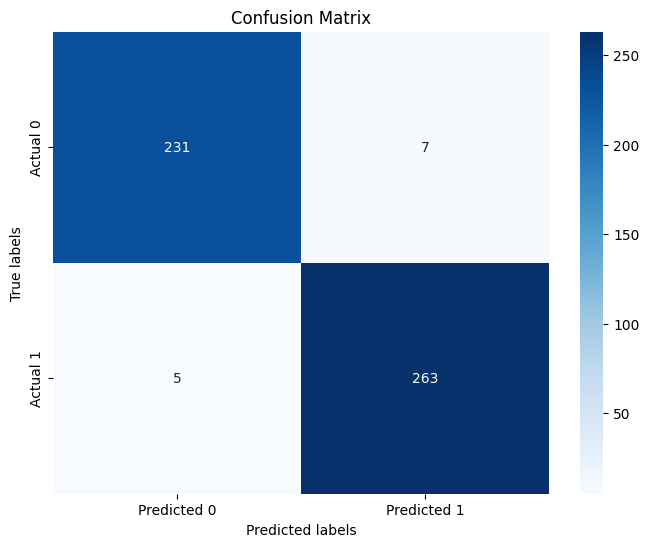

In [30]:

import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true,  y_pred_classes_adjusted)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()